## Load Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-bright')
%matplotlib inline


## Get Data

In [2]:
from j_workflow.data import get_fremont_data
data = get_fremont_data()

## EDA

In [3]:
# pivot wider with rows as time of day and columns as date
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
# sample the first five rows and cols
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


### We seem to have 2 patterns: 2 diurnal peaks, and a single diurnal peak.

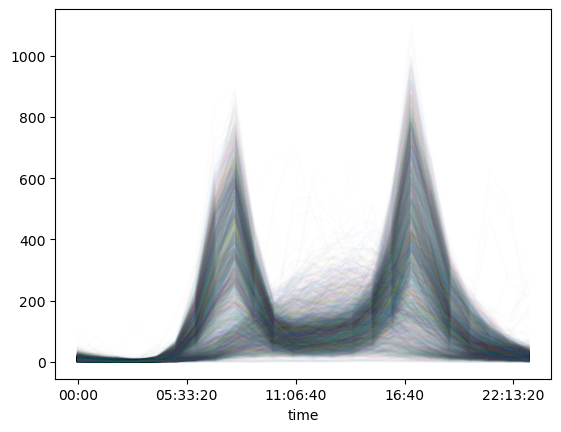

In [4]:
pivoted.plot(legend = False, alpha = 0.01);

In [5]:
data.index # something wrong with hours: AM PM wrong. coz we used %H instead of %I tim e format

DatetimeIndex(['2022-08-01 00:00:00', '2022-08-01 01:00:00',
               '2022-08-01 02:00:00', '2022-08-01 03:00:00',
               '2022-08-01 04:00:00', '2022-08-01 05:00:00',
               '2022-08-01 06:00:00', '2022-08-01 07:00:00',
               '2022-08-01 08:00:00', '2022-08-01 09:00:00',
               ...
               '2022-09-30 14:00:00', '2022-09-30 15:00:00',
               '2022-09-30 16:00:00', '2022-09-30 17:00:00',
               '2022-09-30 18:00:00', '2022-09-30 19:00:00',
               '2022-09-30 20:00:00', '2022-09-30 21:00:00',
               '2022-09-30 22:00:00', '2022-09-30 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=87600, freq=None)

In [6]:
len(np.unique(data.index.time))

24

In [7]:
# update the unit test

In [8]:
pivoted.shape

(24, 3650)

In [9]:
pivoted.T.shape #transpose

(3650, 24)

In [10]:
# pivoted.T

In [11]:
X = pivoted.fillna(0).T.values

## PCA from scikit - learn


In [12]:

X2 = PCA(2, svd_solver='full').fit_transform(X)


In [13]:
#https://www.youtube.com/watch?v=1kA7oD7ftsM&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ&index=9

In [14]:
X2.shape

(3650, 2)

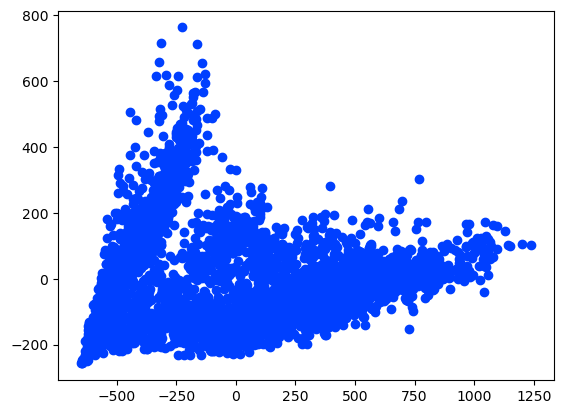

In [15]:

plt.scatter(X2[:,0], X2[:, 1])

## Unsupervised learning with Gaussian Mixture model

In [16]:
# use a gaussian mixture model to identify the type of days
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2) # 2 components
gmm.fit(X)
labels = gmm.predict(X)

In [17]:
labels

array([0, 0, 0, ..., 0, 0, 0])

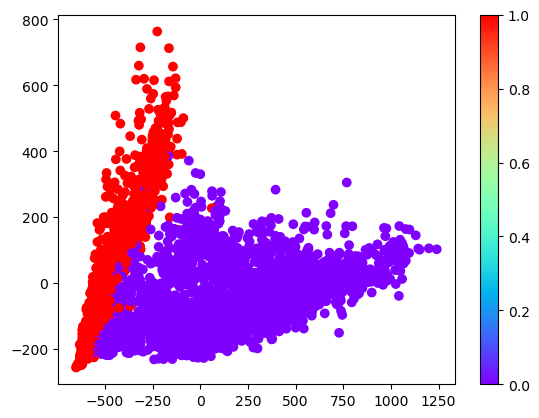

In [18]:
plt.scatter(X2[:,0], X2[:, 1], c= labels, cmap='rainbow')
plt.colorbar();

Text(0.5, 1.0, 'Red Cluster')

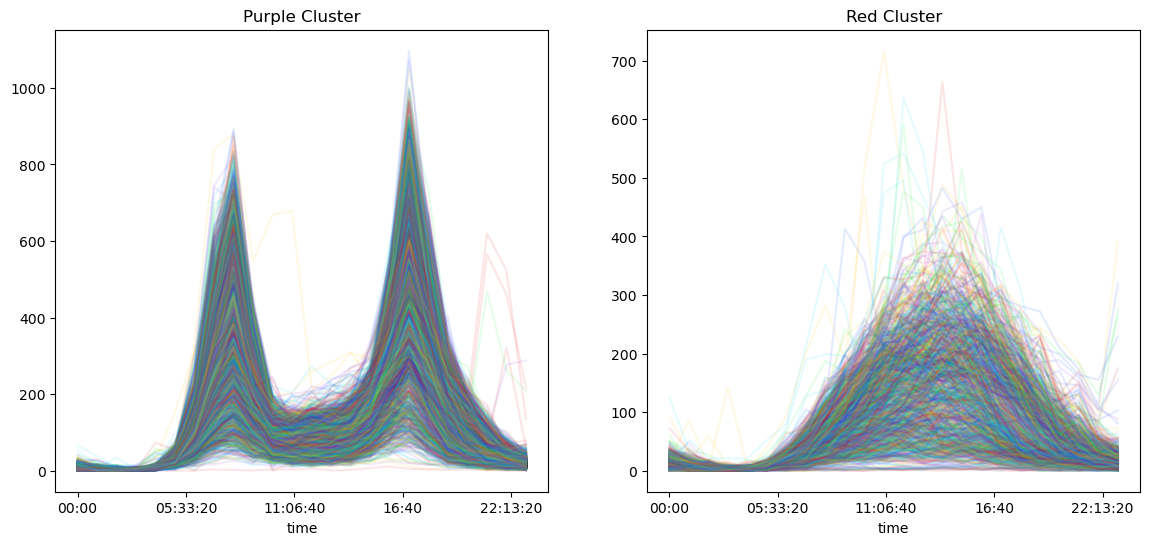

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1, ax = ax[0]);
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1, ax = ax[1]);
ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster')
# possibly weekends

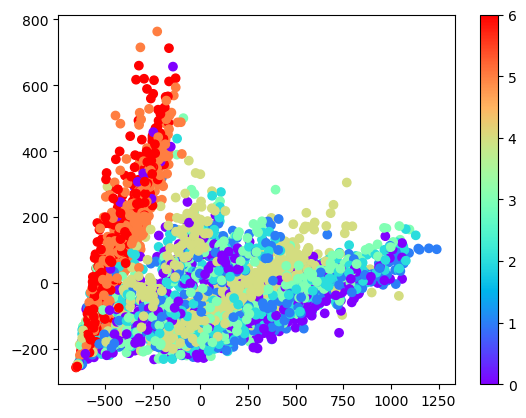

In [20]:
# lets see if the weekdays \ weekend hypothesis is true

dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

plt.scatter(X2[:,0], X2[:, 1], c= dayofweek, cmap='rainbow')
plt.colorbar();

## Analysing Outliers
The following points are weekdays with a holiday - like pattern

In [21]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1 & (dayofweek < 5))] #holidays \ non working

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-02-24', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-07-13', '2013-09-02',
               ...
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03',
               '2022-01-17', '2022-02-21', '2022-05-30', '2022-07-04',
               '2022-07-16', '2022-09-05'],
              dtype='datetime64[ns]', length=115, freq=None)

In [22]:
!jupyter kernelspec list


Available kernels:
  python3    /home/steve/miniconda3/envs/ds01/share/jupyter/kernels/python3
  ir         /home/steve/.local/share/jupyter/kernels/ir
